In [1]:
import pandas as pd

df = pd.read_csv("lightcast_job_postings.csv")

C:\Users\zxgz1\AppData\Local\Temp\ipykernel_60916\2462282455.py:3: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lightcast_job_postings.csv")


3 Skill Gap Analysis

3.1 Team Skill Ratings

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
skills_data = {
    "Name": ["Haoran", "Junze"],
    "Python": [3, 2],
    "SQL": [2, 3],
    "Machine Learning": [4, 3],
    "Cloud Computing": [3, 2],
    "Docker": [2,2],
    "AWS": [2,2],
    "communication": [3,3],
    "leadership": [2,2],
    "problem solving": [4,3],
    "project management": [4,3],
    "business process": [2,3]
}
df_skills = pd.DataFrame(skills_data).set_index("Name")
df_skills

,Python,SQL,Machine Learning,Cloud Computing,Docker,AWS,communication,leadership,problem solving,project management,business process
Name,,,,,,,,,,,
Haoran,3,2,4,3,2,2,3,2,4,4,2
Junze,2,3,3,2,2,2,3,2,3,3,3


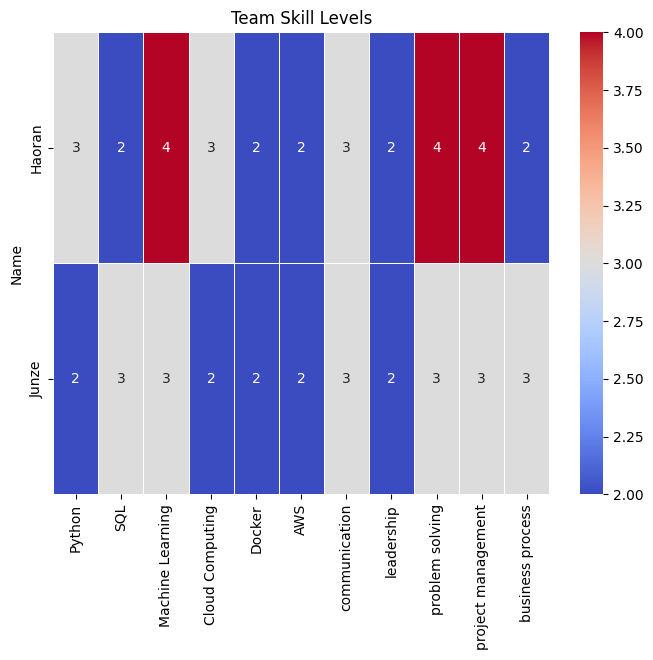

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_skills, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Team Skill Levels")
plt.show()

In [7]:
from collections import Counter

skill_series = df['SKILLS_NAME'].dropna().str.split(',')
skill_series = skill_series.explode()
skill_series = skill_series.str.strip().str.strip('"').str.strip("'").str.lower()
skill_counts = Counter(skill_series)
top_skills = skill_counts.most_common(10)

print("Top 10 In-Demand Skills in Job Postings:")
for skill, count in top_skills:
    print(f"{skill}: {count} postings")

Top 10 In-Demand Skills in Job Postings:
communication: 30768 postings
data analysis: 26797 postings
management: 21274 postings
sql (programming language): 20943 postings
leadership: 17535 postings
problem solving: 16553 postings
operations: 14684 postings
project management: 13609 postings
business process: 13203 postings
business requirements: 12977 postings


In [8]:
import numpy as np
programming_skills = [
    "Python", "SQL", "Machine Learning", "Cloud Computing", "Docker", "AWS"
]

df_skills["Data Analysis"] = df_skills[programming_skills].mean(axis=1).round().astype(int)

In [9]:
df_skills.columns = [col.lower().strip() for col in df_skills.columns]

market_skills_raw = [
    'communication', 'management', 'sql (programming language)',
    'leadership', 'problem solving', 'operations',
    'project management', 'business process', 'business requirements'
]

skill_mapping = {
    'communication': 'communication',
    'management': 'management',
    'sql (programming language)': 'sql',
    'leadership': 'leadership',
    'problem solving': 'problem solving',
    'operations': 'operations',
    'project management': 'project management',
    'business process': 'business process',
    'business requirements': 'business requirements'
}

programming_skills = ['python', 'sql', 'machine learning', 'cloud computing', 'docker', 'aws']
df_skills['data analysis'] = df_skills[programming_skills].mean(axis=1).round().astype(int)
mapped_skills = ['data analysis'] + [skill_mapping[s] for s in market_skills_raw if skill_mapping[s] in df_skills.columns]
mapped_skills = list(dict.fromkeys(mapped_skills)) 
for skill in mapped_skills:
    if skill not in df_skills.columns:
        df_skills[skill] = 0

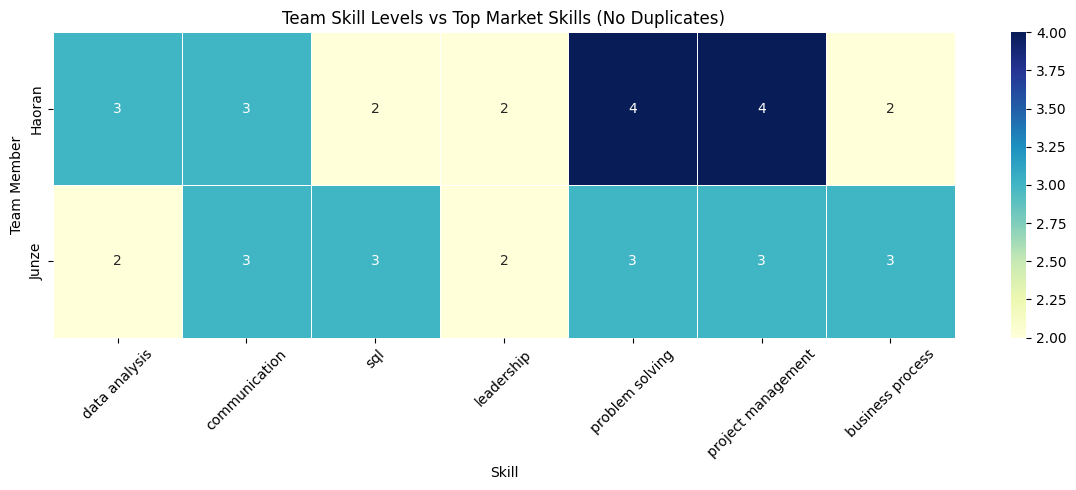

In [10]:
df_skills = df_skills.loc[:, ~df_skills.columns.duplicated()]

plt.figure(figsize=(12, 5))
sns.heatmap(df_skills[mapped_skills], annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Team Skill Levels vs Top Market Skills (No Duplicates)")
plt.xlabel("Skill")
plt.ylabel("Team Member")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3.1.3 Improvement Plans
Our analysis shows that Haoran is well-positioned in the job market due to his strong capability in data analysis, communication, problem solving, and project management. He is matching the job market's requirements especially well in terms of problem solving and project management. For Junze, he is relatively good at communication and sql. 

In terms of skills learning priorities, Haoran can position himself in the market even better by enhancing his skills in SQL and further developing his data analysis skills such as using python. For Junze, he should prioritize the learning of data analysis skills as they are highly demanded by the job market. Junze should also further his familiarity with SQL to better adapt to the job market. 

To improve their skills, members in team 4 can utilize resources on the web (online tutorials, Coursera courses, etc.) to self-learn essential skills such as python and SQL. They can also consider taking more advanced courses in BU MET about data analysis and communication to improve corresponding skills.

To collaborate within the team, Haoran and Junze can teach each other and communicate the knowledge of python and SQL. They can share valuable information about their working experience or previous projects to deepen understanding about both the skills themselves and the job market as a whole. 